[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
epoch=0: loss=36.28370666503906
epoch=100: loss=4.2634782791137695
epoch=200: loss=4.10125207901001
epoch=300: loss=4.100430011749268
epoch=400: loss=4.10042667388916
epoch=500: loss=4.100425720214844
epoch=600: loss=4.100425720214844
epoch=700: loss=4.100425720214844
epoch=800: loss=4.100425720214844
epoch=900: loss=4.100425720214844
w=3.0367. b=-10.4558, loss=4.100425720214844


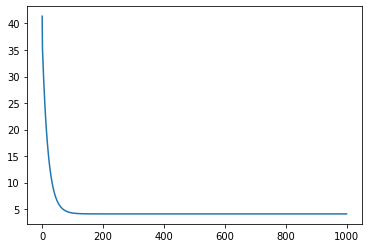

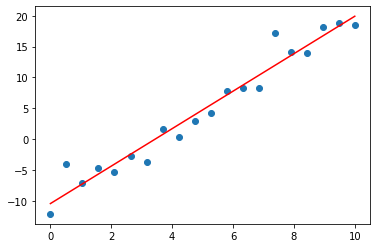

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = x*w + b
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = np.linspace(0.0, 10.0, num=train_size)
print(x)
w_true, b_true = 3, -10  # truth, line parameters
t = x*w_true + b_true + np.random.normal(0.0, 2.0, size=train_size) # 평균 = 0.0, 표준 편차 = 2.0, size=20

# train parameters
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)

batch_size = 4
K = train_size // batch_size

loss_list = []
for epoch in range(EPOCH):   
    batch_loss = 0.0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        # print(mask)
        x_batch = x[mask]
        t_batch = t[mask]
        opt.minimize(mse_loss, var_list= [w, b])
        loss = mse_loss().numpy()
        batch_loss += loss
    batch_loss /= K
    loss_list.append(batch_loss) 
    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))

print("w={:>.4f}. b={:>.4f}, loss={}".format(w.numpy(), b.numpy(), loss)) # w_true = 3, b_true = -10

plt.plot(loss_list)
plt.show()

plt.scatter(x, t)  # train data plot

w_pred, b_pred = w.numpy(), b.numpy() # predicted, line parameters
t_pred= x*w_pred + b_pred 
plt.plot(x, t_pred, 'r-')
plt.show()
